In [217]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [218]:
main_df = pd.read_csv('../data/raw/medical_insurance_cost.csv')
main_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h3>Búsqueda de nulos</h3>

In [219]:
# Search empty data on columns
null_counts = main_df.isnull().sum()
print(null_counts)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<h3>Búsqueda y eliminación de duplicados</h3>

In [220]:
duplicated = main_df[main_df.duplicated()]
print(duplicated)

main_df = main_df.drop_duplicates()

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


<h3>Búsqueda y procesado de valores atípicos</h3>

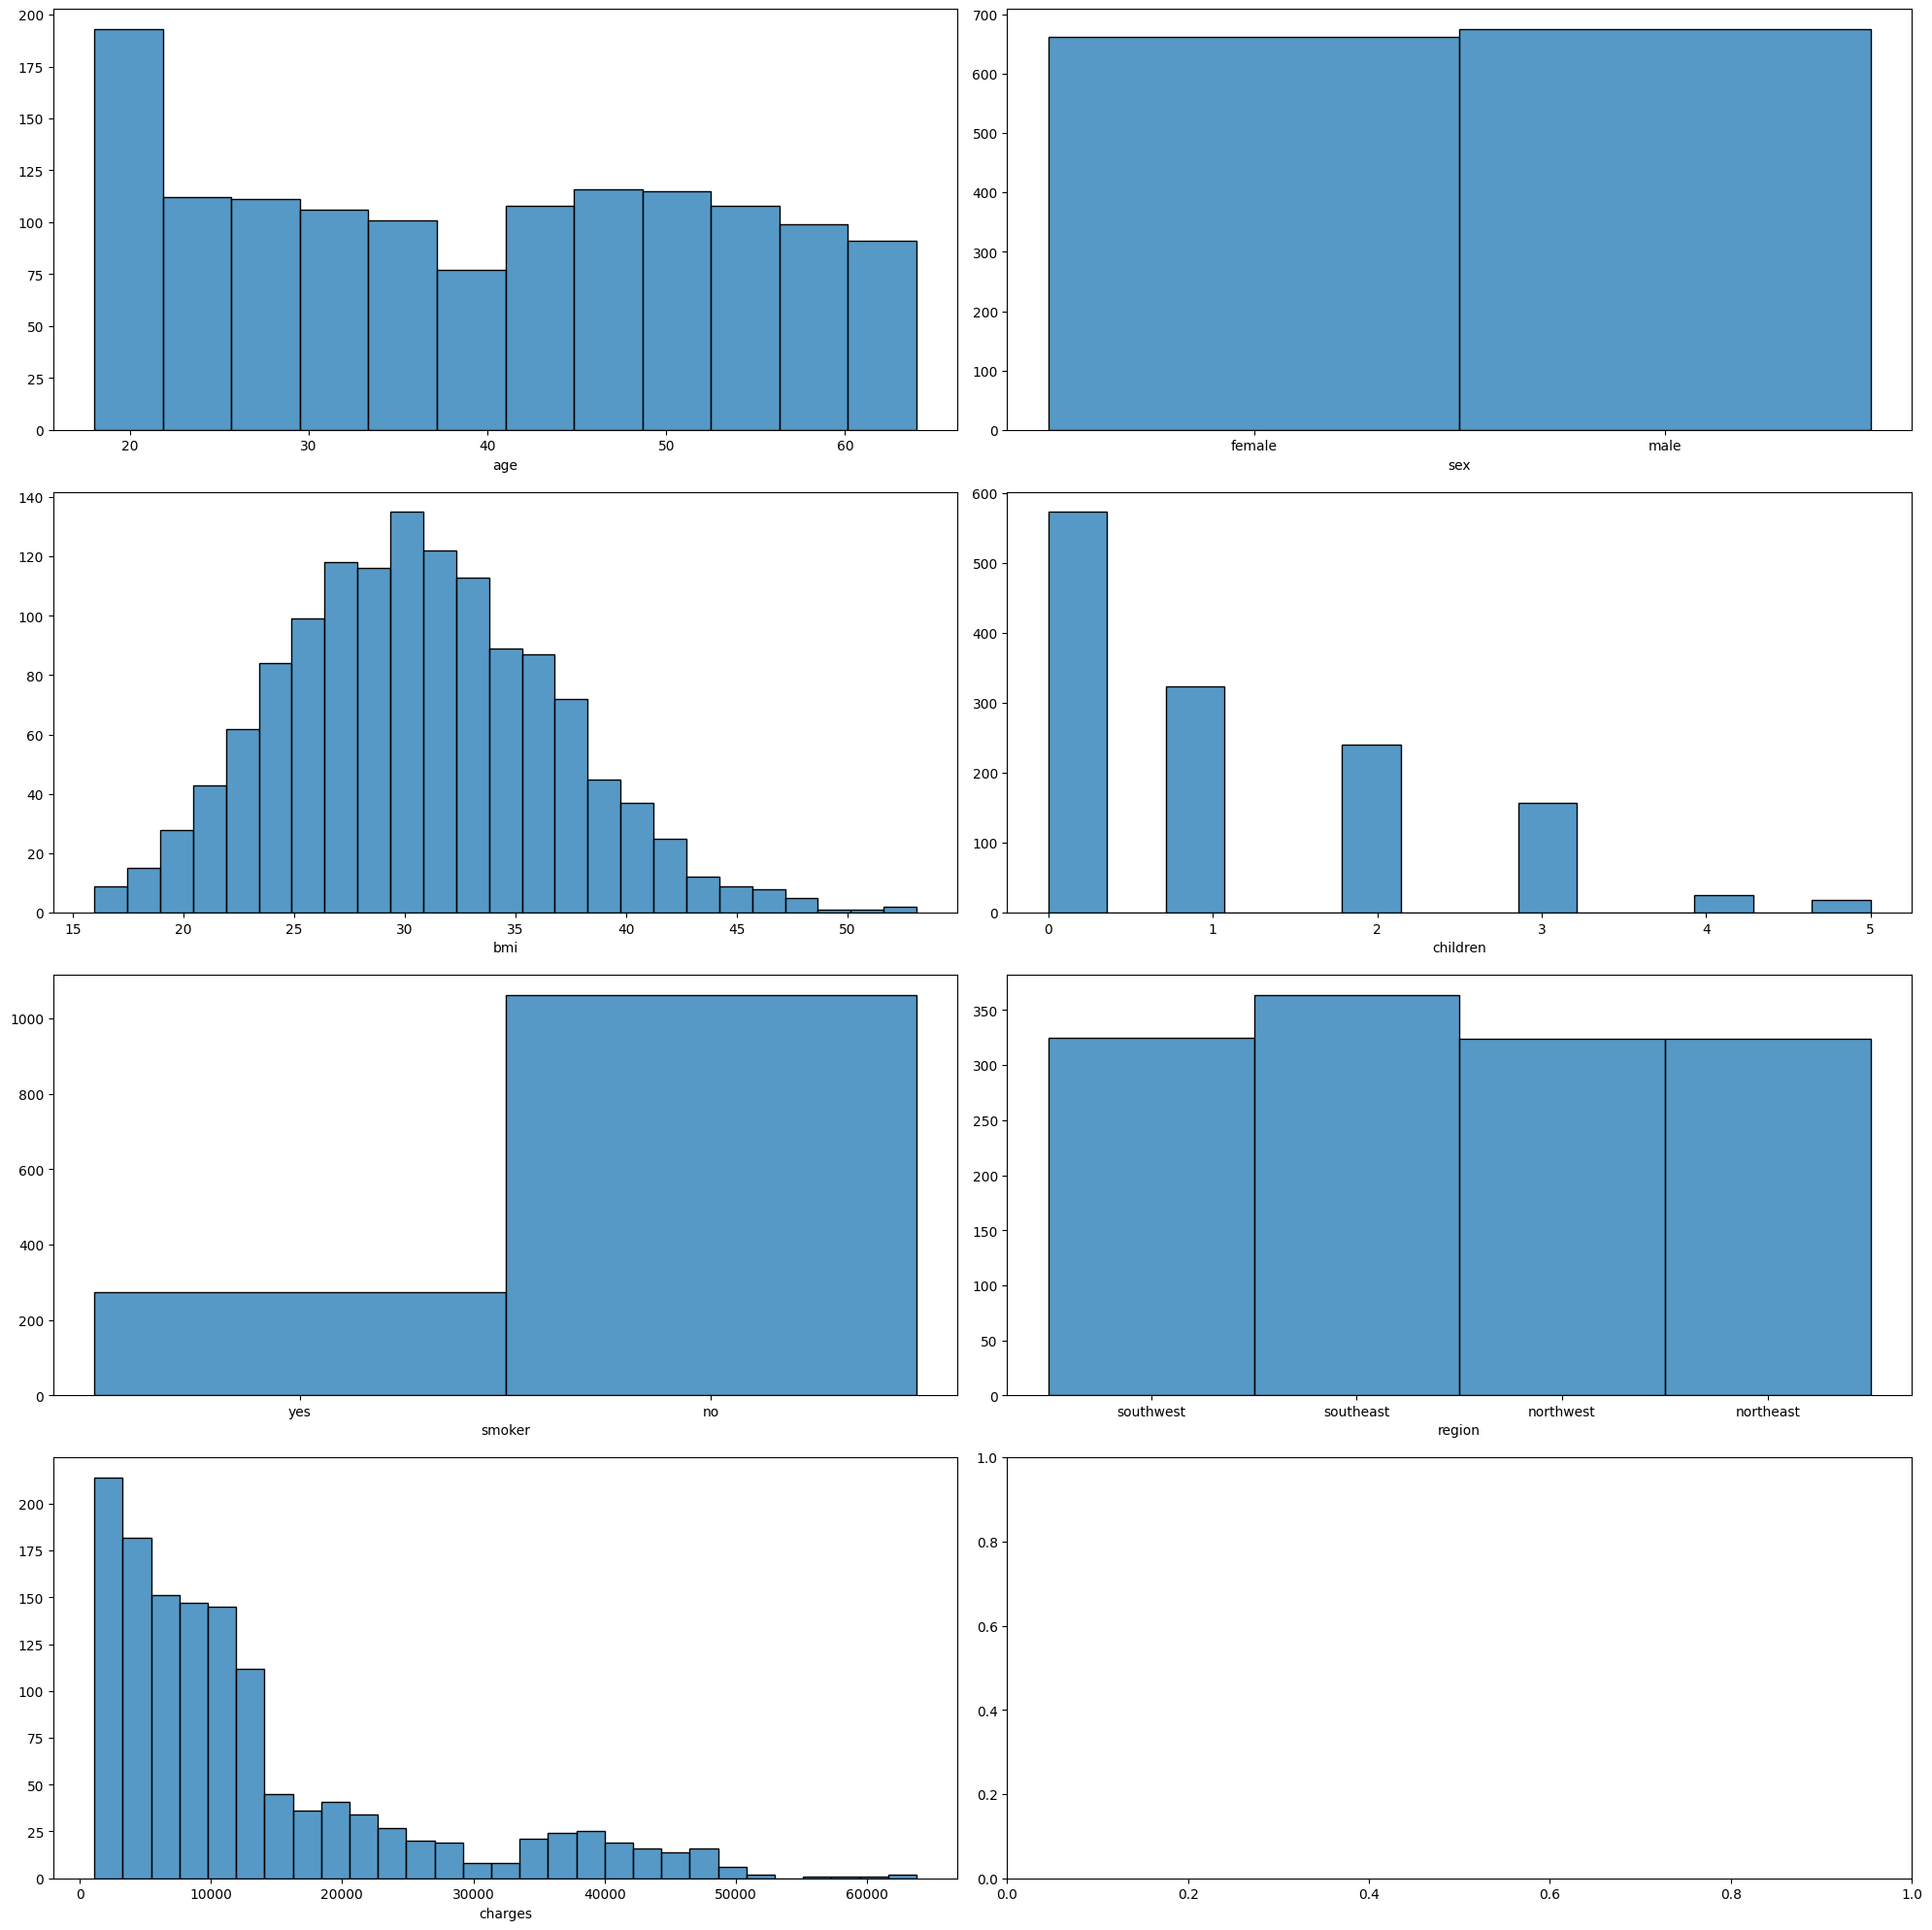

In [221]:
# Graphic analysis
fig, axis = plt.subplots(4, 2, figsize=(20, 20))

sns.histplot(ax=axis[0, 0], data=main_df, x='age').set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=main_df, x='sex').set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=main_df, x='bmi').set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=main_df, x='children').set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=main_df, x='smoker').set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=main_df, x='region').set(ylabel=None)
sns.histplot(ax=axis[3, 0], data=main_df, x='charges').set(ylabel=None)

plt.tight_layout()
plt.show()

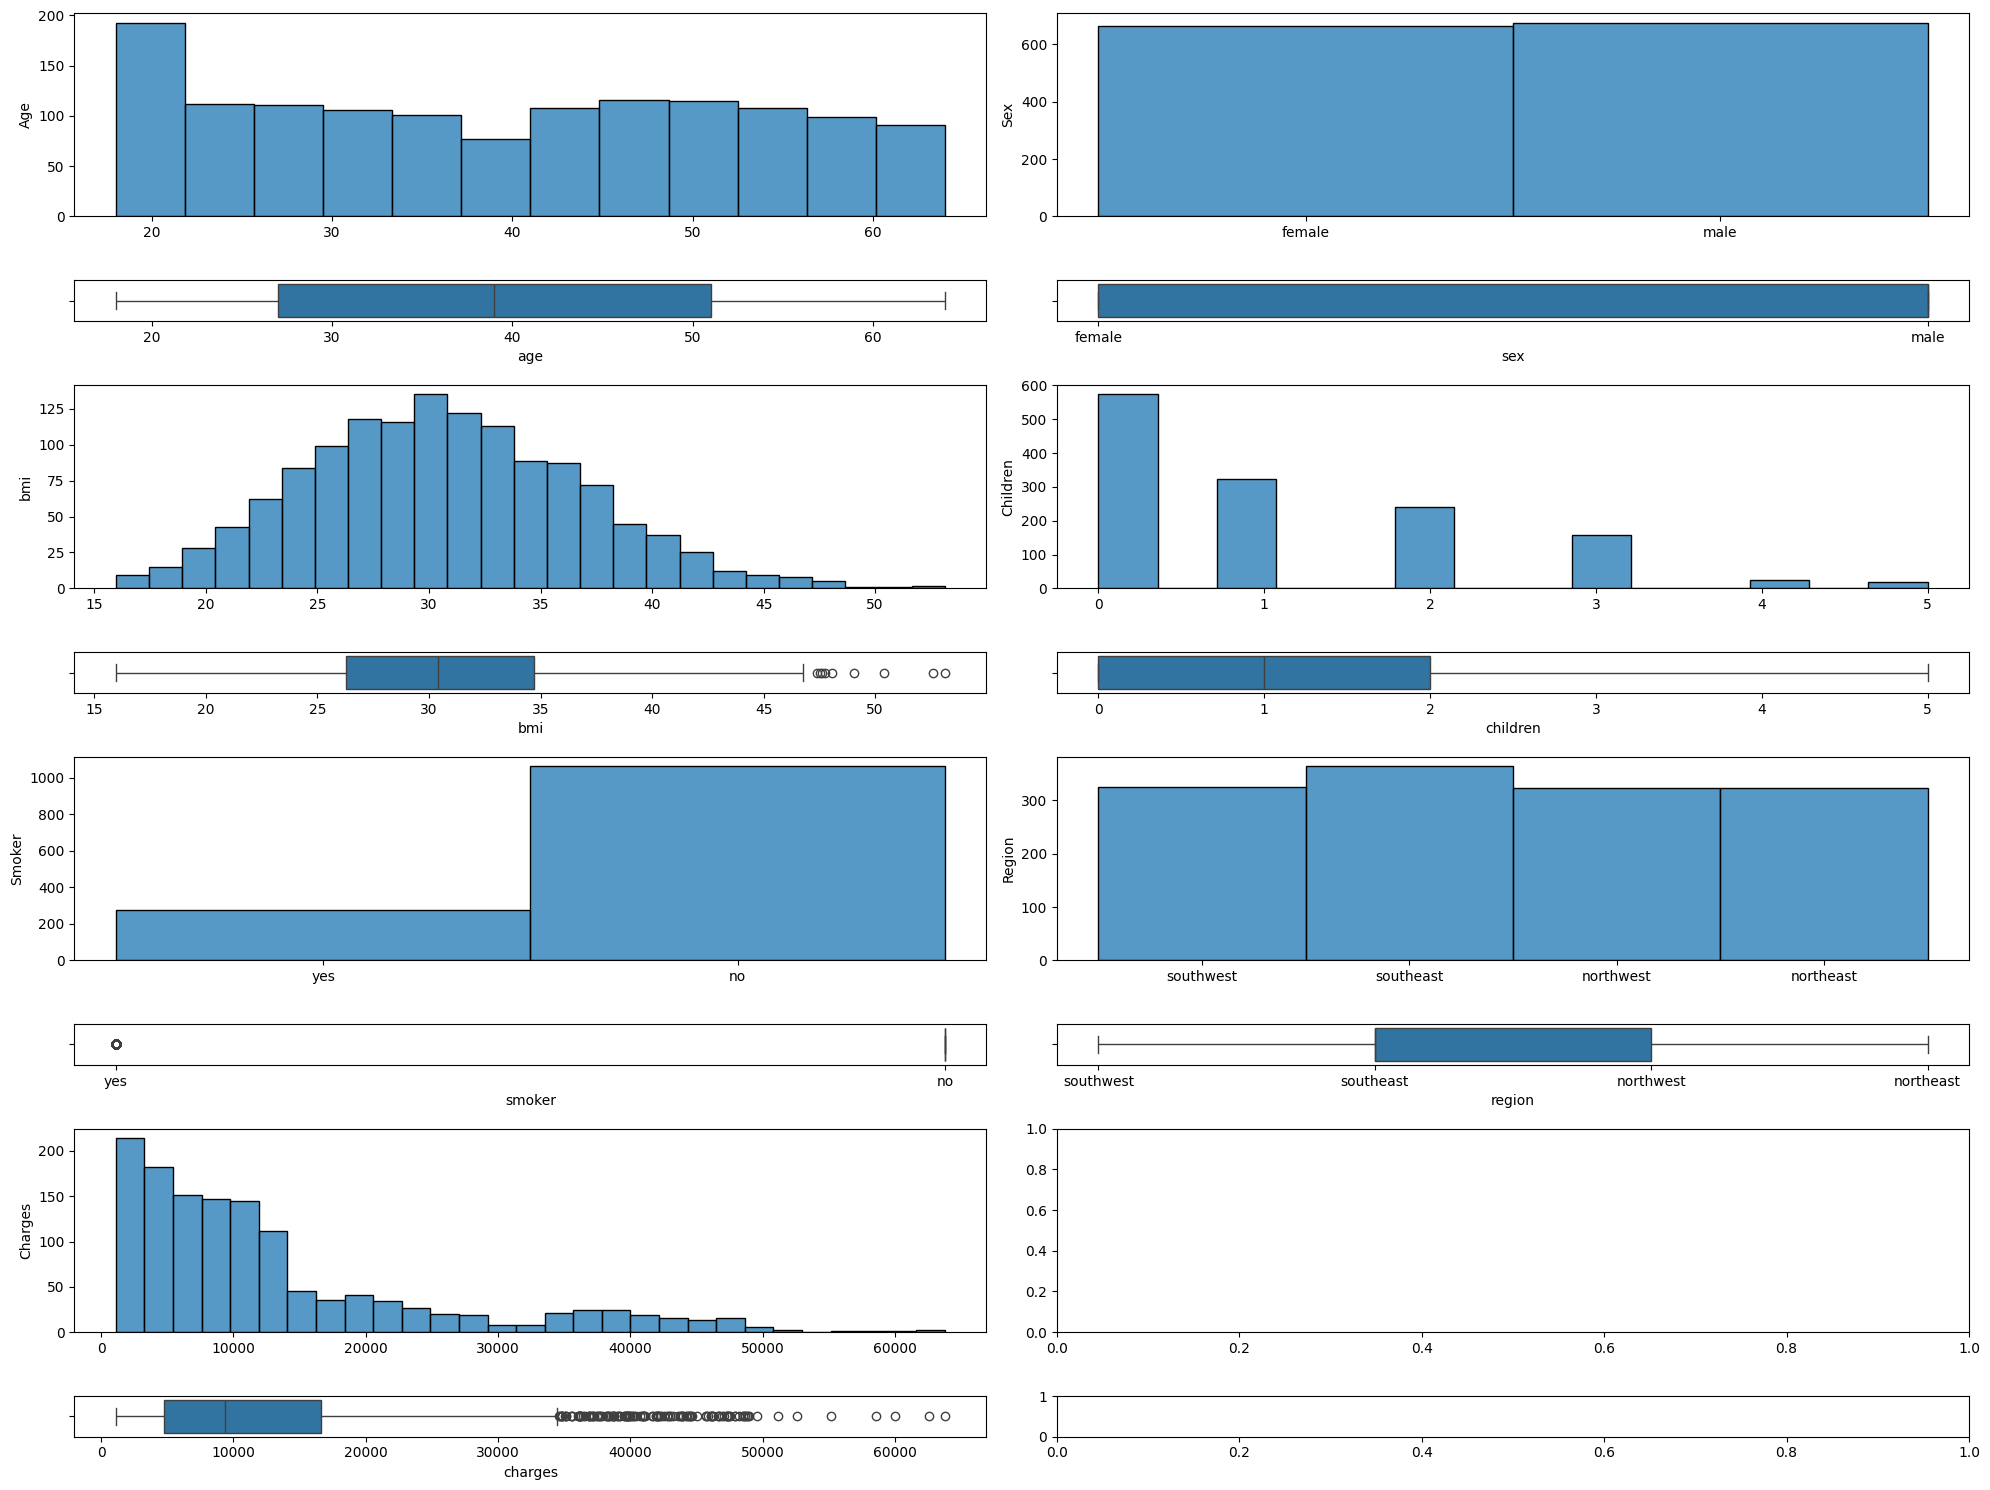

In [222]:
# Check outliers
fig, axis = plt.subplots(8, 2, figsize=(20, 15), gridspec_kw={'height_ratios': [10, 2] * 4})

sns.histplot(ax=axis[0, 0], data=main_df, x="age").set(xlabel=None)
axis[0, 0].set_ylabel('Age')
sns.boxplot(ax=axis[1, 0], data=main_df, x="age")

sns.histplot(ax=axis[0, 1], data=main_df, x="sex").set(xlabel=None)
axis[0, 1].set_ylabel('Sex')
sns.boxplot(ax=axis[1, 1], data=main_df, x="sex")

sns.histplot(ax=axis[2, 0], data=main_df, x="bmi").set(xlabel=None)
axis[2, 0].set_ylabel('bmi')
sns.boxplot(ax=axis[3, 0], data=main_df, x="bmi")

sns.histplot(ax=axis[2, 1], data=main_df, x="children").set(xlabel=None)
axis[2, 1].set_ylabel('Children')
sns.boxplot(ax=axis[3, 1], data=main_df, x="children")

sns.histplot(ax=axis[4, 0], data=main_df, x="smoker").set(xlabel=None)
axis[4, 0].set_ylabel('Smoker')
sns.boxplot(ax=axis[5, 0], data=main_df, x="smoker")

sns.histplot(ax=axis[4, 1], data=main_df, x="region").set(xlabel=None)
axis[4, 1].set_ylabel('Region')
sns.boxplot(ax=axis[5, 1], data=main_df, x="region")

sns.histplot(ax=axis[6, 0], data=main_df, x="charges").set(xlabel=None)
axis[6, 0].set_ylabel('Charges')
sns.boxplot(ax=axis[7, 0], data=main_df, x="charges")

plt.tight_layout()
plt.show()

In [223]:
def get_Q_per_data(column):
    Q1 = main_df[column].quantile(0.25)
    Q3 = main_df[column].quantile(0.75)
    IQR = Q3 - Q1

    quartiles = {
        'severe_lower': Q1 - 3 * IQR,
        'lower': Q1 - 1.5 * IQR,
        'upper': Q1 + 1.5 * IQR,
        'severe_upper': Q1 + 3 * IQR,
    }

    return quartiles

In [224]:
high_bmi = main_df[main_df['bmi'] >= get_Q_per_data('bmi')['severe_upper']]

total_bmi = main_df['bmi'].count()
high_bmi_count = high_bmi['bmi'].count()

print((high_bmi_count / total_bmi) * 100)

print(f'Shape before remove outliers:\n{main_df.shape}\n')
severe_upper = get_Q_per_data('bmi')['severe_upper']
main_df = main_df[main_df['bmi'] <= severe_upper]
print(f'Shape after remove outliers:\n{main_df.shape}\n')

0.14958863126402394
Shape before remove outliers:
(1337, 7)

Shape after remove outliers:
(1335, 7)



In [225]:
high_charges = main_df[main_df['charges'] >= get_Q_per_data('charges')['severe_upper']]

total_charges = main_df['charges'].count()
high_charges_count = high_charges['charges'].count()

print((high_charges_count / total_charges) * 100)

5.543071161048689


Aunque tenemos un porcentaje de outliers que podríamos eliminar para la columna charges, debido a que el modelo empeora considerablemente si no los dejamos, no se eliminarán.

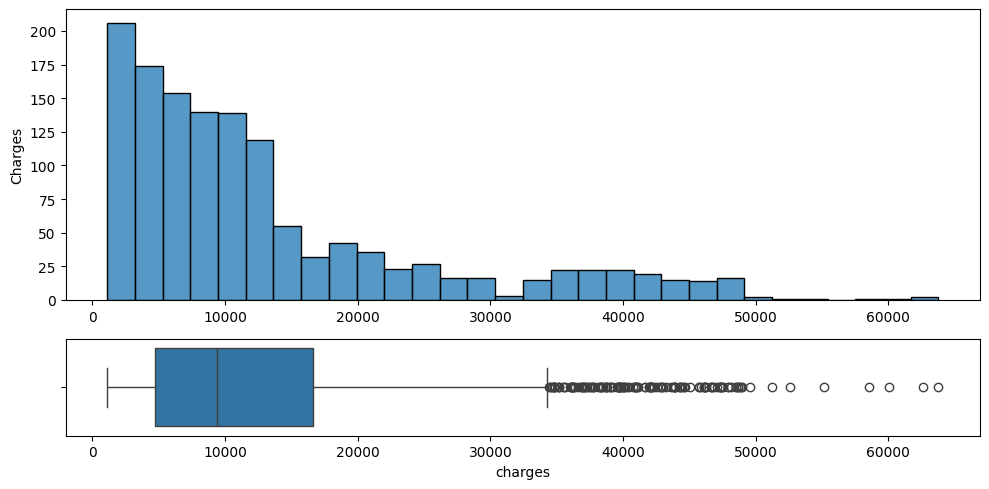

In [226]:
fig, axis = plt.subplots(2, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

sns.histplot(ax=axis[0], data=main_df, x="charges").set(xlabel=None)
axis[0].set_ylabel('Charges')
sns.boxplot(ax=axis[1], data=main_df, x="charges")

plt.tight_layout()
plt.show()

A continuación pasaremos a hacer un análisis multivariante numérico-numérico. Para ello, ya que tenemos algunas variables categóricas que podemos entender como números, procedemos a transformarlas para su correcto procesamiento.

In [227]:
le = LabelEncoder()

categorical_variables = [
    'sex',
    'smoker',
    'region',
    ]

for each in categorical_variables:
    main_df[each] = le.fit_transform(main_df[each])

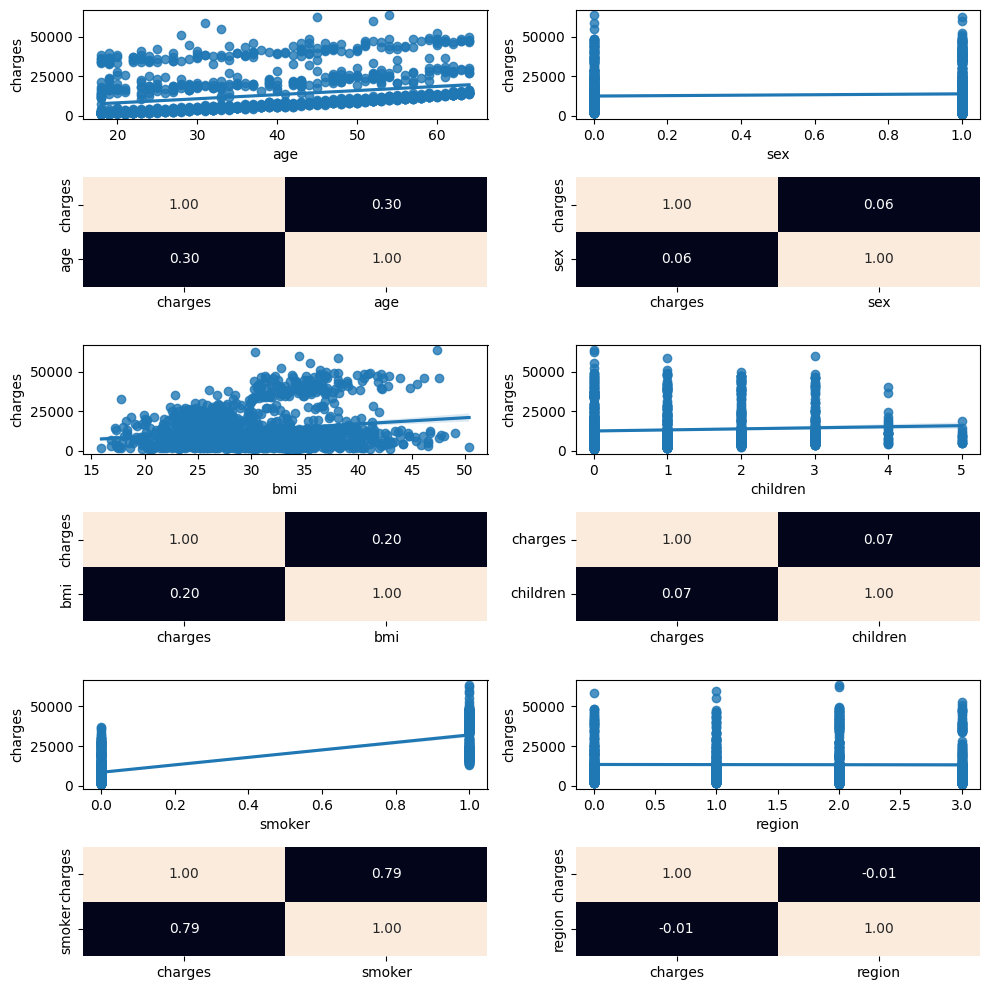

In [228]:
# Numerical-numerical analysis
fig, axis = plt.subplots(6, 2, figsize = (10, 10))

sns.regplot(ax = axis[0, 0], data = main_df, x = "age", y = "charges")
sns.heatmap(main_df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = main_df, x = "sex", y = "charges")
sns.heatmap(main_df[["charges", "sex"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = main_df, x = "bmi", y = "charges")
sns.heatmap(main_df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = main_df, x = "children", y = "charges")
sns.heatmap(main_df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[4, 0], data = main_df, x = "smoker", y = "charges")
sns.heatmap(main_df[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)

sns.regplot(ax = axis[4, 1], data = main_df, x = "region", y = "charges")
sns.heatmap(main_df[["charges", "region"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

plt.tight_layout()
plt.show()

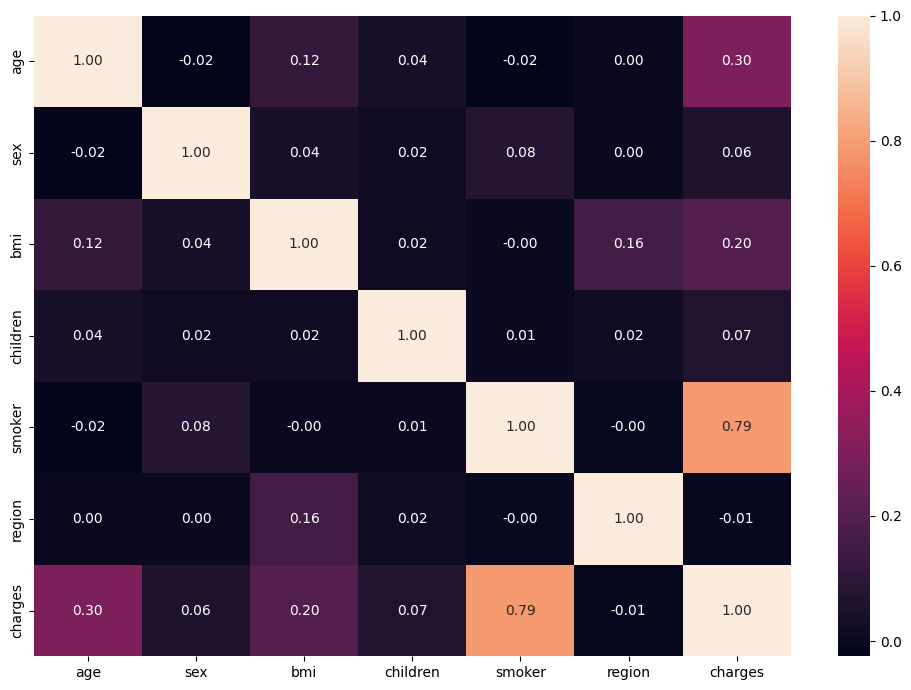

In [229]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(main_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [230]:
# Descriptive analysis
main_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1335.000000,1335.00000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.250936,0.50412,30.630206,1.096629,0.204494,1.515356,13264.809413
std,14.034893,0.50017,6.044168,1.206099,0.403483,1.105877,12084.688365
min,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.00000,26.255000,0.000000,0.000000,1.000000,4746.698450
50%,39.000000,1.00000,30.360000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.00000,34.637500,2.000000,0.000000,2.000000,16622.107580
max,64.000000,1.00000,50.380000,5.000000,1.000000,3.000000,63770.428010


In [231]:
# Inference of new features
main_df['log_bmi'] = np.log(main_df['bmi'])
main_df['bmi_smoker'] = main_df['bmi'] * main_df['smoker']


In [232]:
# Save clean dataframe into a csv file
main_df.to_csv('../data/processed/PROCESSED_DF.csv', index=False, encoding='utf-8')